# Introduction

### This tutorial is to explain the use and demonstrate the use of the microstructure characterisation library

### The data filed for the microstructure images can be found in the folder 'data' and the scripts in the folder 'Scripts'

## Importing libraries

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from Scripts import SpatialCorrelations as corr
from Scripts import plots
from Scripts import hoshenKopleman as hosh
from Scripts import convexity as conv
import warnings

## Reading and preprocessing image files

In [2]:
image_path ='data/'

In [3]:
path = image_path
list_of_files = os.listdir(path)
list_of_files.sort()
list_files = []
for i in list_of_files:
    if i[-5:]=='0.dat':
        list_files.append(path+i)


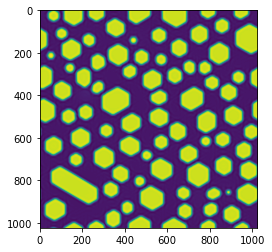

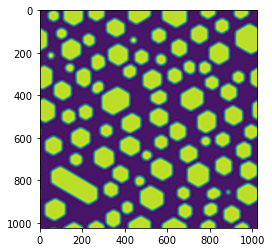

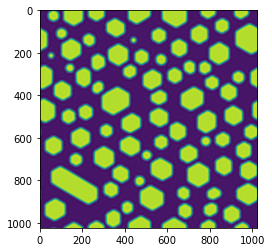

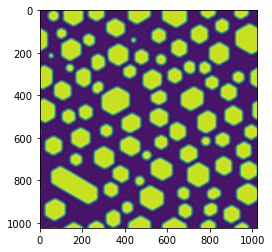

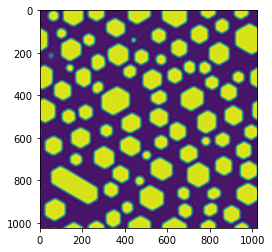

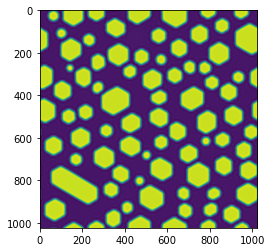

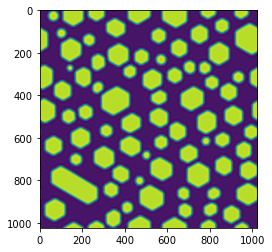

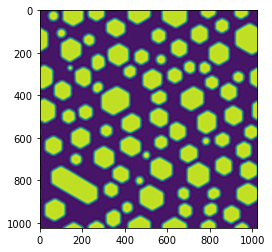

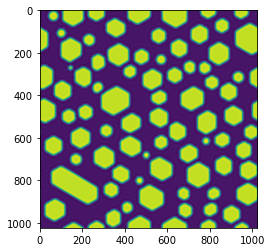

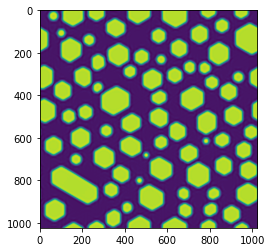

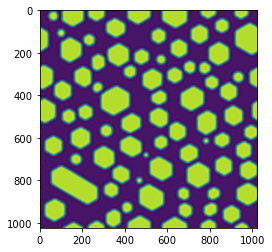

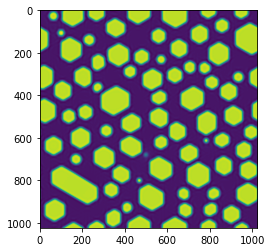

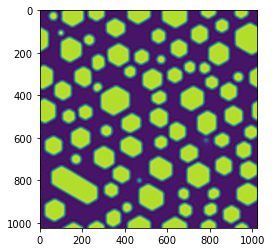

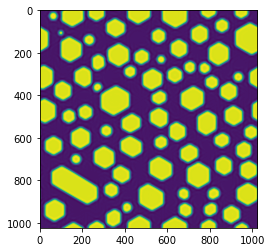

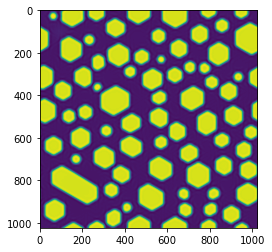

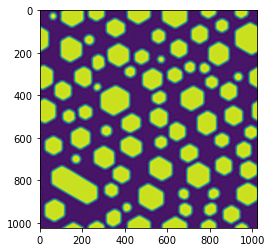

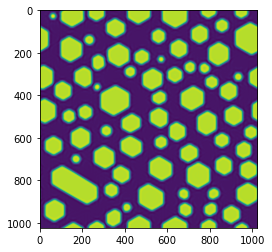

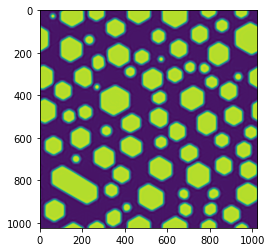

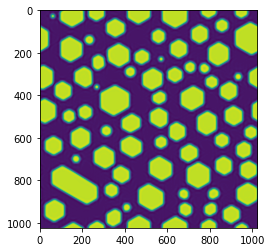

In [4]:
# Show some of the images

for i in list_files:
    img = corr.dat_to_numpy(i)
    plt.imshow(img)
    plt.show()

## Calculating different types of correlations

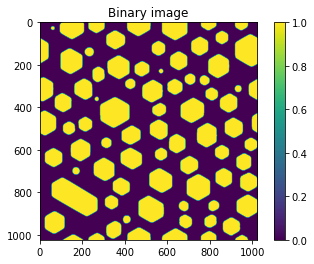

In [5]:
# Binarize the image

img_binary = corr.binarize_image_dat(img)

# show binary image
plt.imshow(img_binary)
plt.colorbar()
plt.title('Binary image')
plt.show()

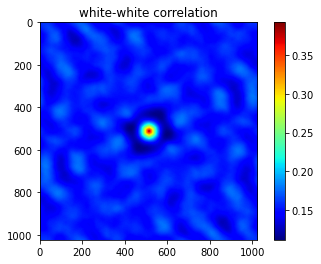

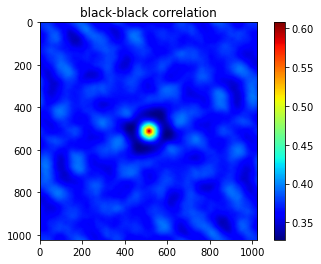

In [6]:
# AutoCorrelations

white_stats, black_stats = corr.auto_corr_from_code(img_binary)
plt.imshow(white_stats, cmap='jet')
plt.colorbar()
plt.title('white-white correlation')
plt.show()

plt.imshow(black_stats, cmap='jet')
plt.colorbar()
plt.title('black-black correlation')

plt.show()

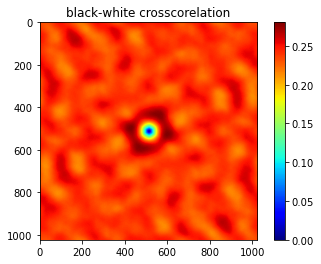

In [7]:
# crosscorrelation

cross = corr.cross_corr_from_code(img_binary)
plt.imshow(cross, cmap='jet')
plt.colorbar()
plt.title('black-white crosscorelation')
plt.show()

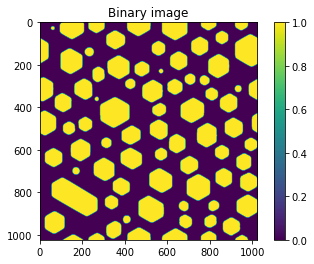

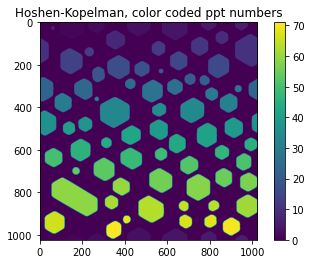

In [8]:
# show binary image
plt.imshow(img_binary)
plt.colorbar()
plt.title('Binary image')
plt.show()

# Cluster the image, Could take ~ 60 sec

labels = hosh.hoshenKoplemanLabels(img_binary)
plt.imshow(labels)
plt.colorbar()
plt.title('Hoshen-Kopelman, color coded ppt numbers')
plt.show()

## Looking at the Precipitate size distribution histogram 

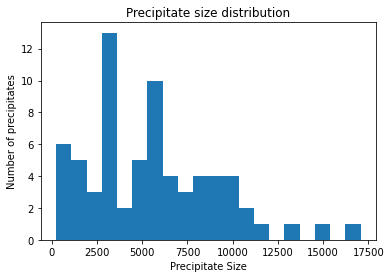

In [9]:
hist_non_PBC, bins_non_PBC = hosh.getHistogram(labels,0,20000,20)



## Radian Correlations and Angular correlations

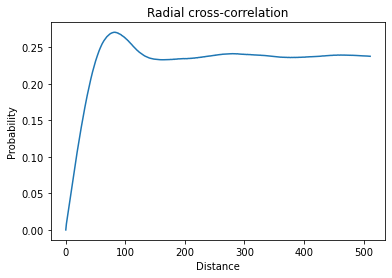

In [10]:
# Let us consider the radial probability distribution based on our previously calculated cross-correlation 'cross'

r_val =corr.radialDistribution(cross)
plt.plot(r_val)
plt.title('Radial cross-correlation')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.show()

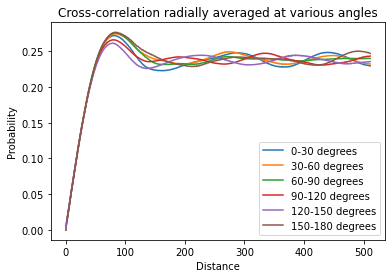

In [11]:
# For angular (0-60 degree), circularally averaged cross-correlation
warnings.filterwarnings('ignore')
AngleChosenForOutput030, angularProbDistribution030 =corr.angularDistribution(cross,0,30,0)
plt.plot(angularProbDistribution030, label="0-30 degrees" )

AngleChosenForOutput3060, angularProbDistribution3060 =corr.angularDistribution(cross,30,60,0)
plt.plot(angularProbDistribution3060, label="30-60 degrees")

AngleChosenForOutput6090, angularProbDistribution6090 =corr.angularDistribution(cross,60,90,0)
plt.plot(angularProbDistribution6090, label="60-90 degrees")

AngleChosenForOutput90120, angularProbDistribution90120 =corr.angularDistribution(cross,90,120,0)
plt.plot(angularProbDistribution90120, label="90-120 degrees" )

AngleChosenForOutput120150, angularProbDistribution120150 =corr.angularDistribution(cross,120,150,0)
plt.plot(angularProbDistribution120150, label="120-150 degrees")

AngleChosenForOutput150180, angularProbDistribution150180 =corr.angularDistribution(cross,150,180,0)
plt.plot(angularProbDistribution150180, label="150-180 degrees")

plt.title('Cross-correlation radially averaged at various angles')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.legend(loc="lower right")
plt.show()


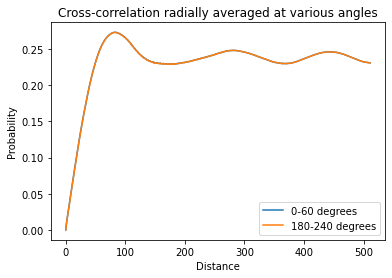

In [12]:

AngleChosenForOutput060, angularProbDistribution060 =corr.angularDistribution(cross,0,60,0)
plt.plot(angularProbDistribution060, label="0-60 degrees" )

AngleChosenForOutput180240, angularProbDistribution180240 =corr.angularDistribution(cross,180,240,0)
plt.plot(angularProbDistribution180240, label="180-240 degrees")



plt.title('Cross-correlation radially averaged at various angles')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.legend(loc="lower right")
plt.show()

## Calculating angular correlations for simulated anisotropic precipitates

In [13]:
from PIL import Image
im = Image.open('/Users/adithyaiyer/Desktop/ddp/mist/Experimental Microstructures/Anisotropy/sim_rectangular.PNG').convert('L')
image = np.array(im)

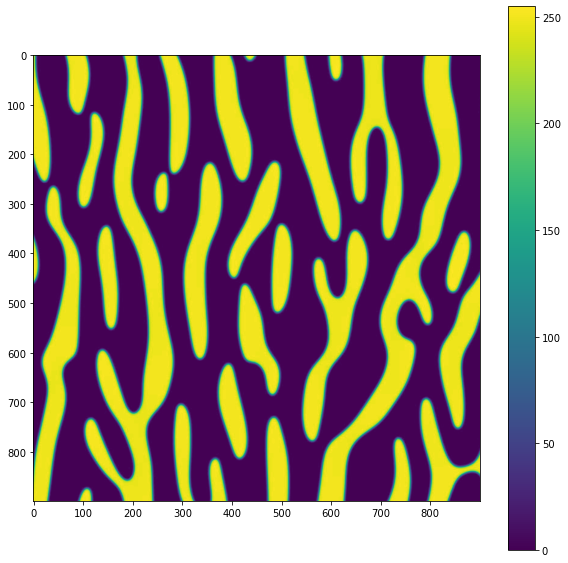

In [14]:
# Subsetting the image
cropped_image = image[0:900,0:900]
plt.figure(figsize = (10,10))
plt.imshow(cropped_image)
plt.colorbar()
plt.show()

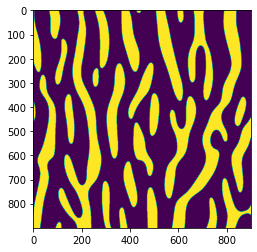

In [15]:
binarized = hosh.binarizeRealImage(cropped_image,upper_limit=300,lower_limit=150)
plt.imshow(binarized)
plt.show()

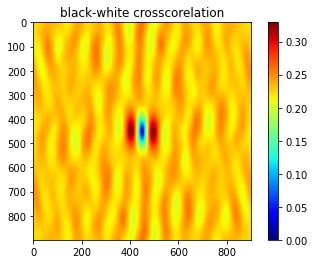

In [16]:
# crosscorrelation

cross = corr.cross_corr_from_code(binarized)
plt.imshow(cross, cmap='jet')
plt.colorbar()
plt.title('black-white crosscorelation')
plt.show()

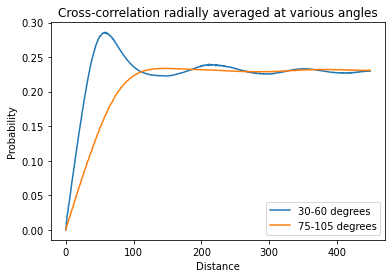

In [17]:
# For angular (0-60 degree), circularally averaged cross-correlation

AngleChosenForOutput3060, angularProbDistribution3060 =corr.angularDistribution(cross,30,60,0)
plt.plot(angularProbDistribution3060, label="30-60 degrees")

AngleChosenForOutput75105, angularProbDistribution75105 =corr.angularDistribution(cross,75,105,0)
plt.plot(angularProbDistribution75105, label="75-105 degrees")

plt.title('Cross-correlation radially averaged at various angles')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.legend(loc="lower right")
plt.show()

## Calculating angular correlations for experimental Precipitates

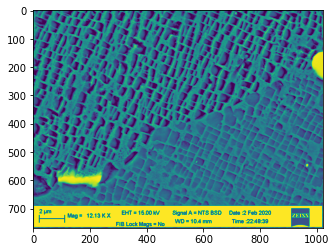

In [18]:
from PIL import Image
im = Image.open('/Users/adithyaiyer/Desktop/ddp/mist/Experimental Microstructures/image1.tiff').convert('L')

image = np.array(im)
plt.imshow(im)

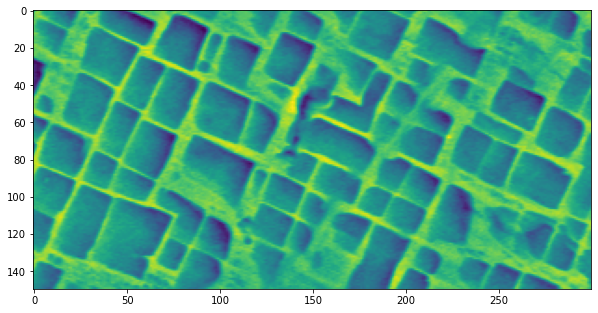

In [19]:
# Subsetting the image
cropped_image = image[500:650,600:900]
plt.figure(figsize = (10,10))
plt.imshow(cropped_image)
#plt.colorbar()
plt.show()

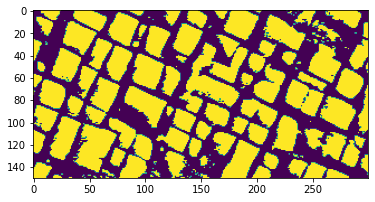

In [20]:
binarized = hosh.binarizeRealImage(cropped_image,upper_limit=100,lower_limit=0)
plt.imshow(binarized)
plt.show()

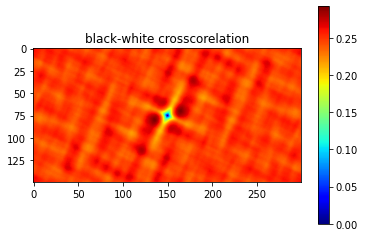

In [21]:
# crosscorrelation

cross = corr.cross_corr_from_code(binarized)
plt.imshow(cross, cmap='jet')
plt.colorbar()
plt.title('black-white crosscorelation')
plt.show()

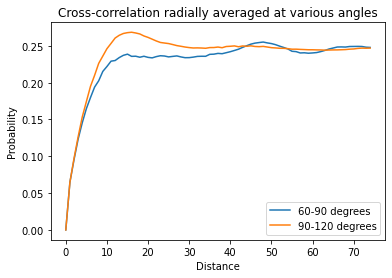

In [22]:
# For angular (0-60 degree), circularally averaged cross-correlation



AngleChosenForOutput6090, img1_angularProbDistribution6090 =corr.angularDistribution(cross,60,90,0)
plt.plot(img1_angularProbDistribution6090, label="60-90 degrees")

AngleChosenForOutput90120, img1_angularProbDistribution90120 =corr.angularDistribution(cross,90,120,0)
plt.plot(img1_angularProbDistribution90120, label="90-120 degrees" )

plt.title('Cross-correlation radially averaged at various angles')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.legend(loc="lower right")
plt.show()

## Using different region in same image

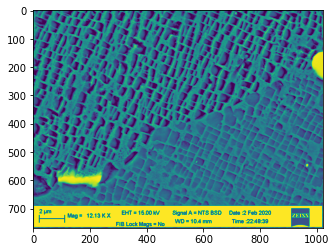

In [23]:
from PIL import Image
im = Image.open('/Users/adithyaiyer/Desktop/ddp/mist/Experimental Microstructures/image1.tiff').convert('L')

image = np.array(im)
plt.imshow(im)

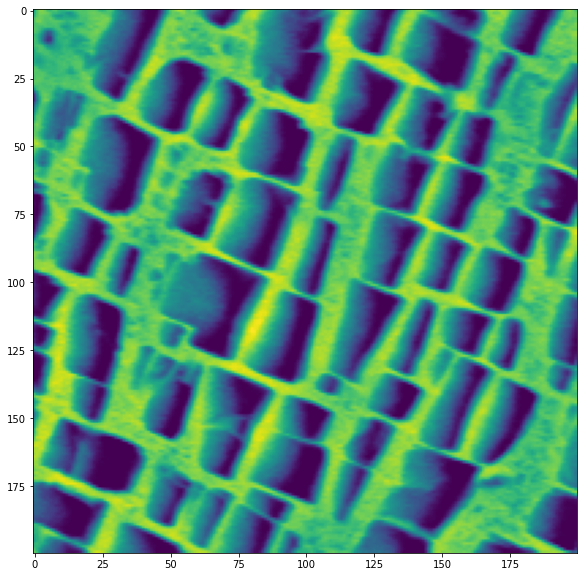

In [24]:
# Subsetting the image
cropped_image = image[100:300,400:600]
plt.figure(figsize = (10,10))
plt.imshow(cropped_image)
plt.show()

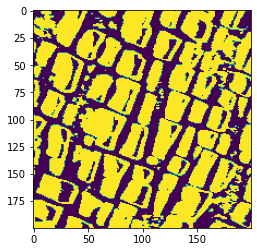

In [25]:
binarized = hosh.binarizeRealImage(cropped_image,upper_limit=130,lower_limit=0)
plt.imshow(binarized)
plt.show()

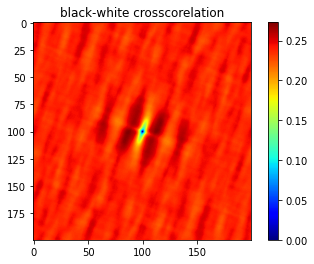

In [26]:
# crosscorrelation

cross = corr.cross_corr_from_code(binarized)
plt.imshow(cross, cmap='jet')
plt.colorbar()
plt.title('black-white crosscorelation')
plt.show()

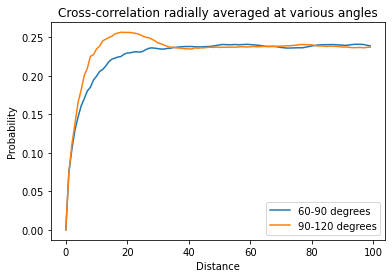

In [27]:
# For angular (0-60 degree), circularally averaged cross-correlation


AngleChosenForOutput6090, img2_angularProbDistribution6090 =corr.angularDistribution(cross,60,90,0)
plt.plot(img2_angularProbDistribution6090, label="60-90 degrees")

AngleChosenForOutput90120, img2_angularProbDistribution90120 =corr.angularDistribution(cross,90,120,0)
plt.plot(img2_angularProbDistribution90120, label="90-120 degrees" )

plt.title('Cross-correlation radially averaged at various angles')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.legend(loc="lower right")
plt.show()

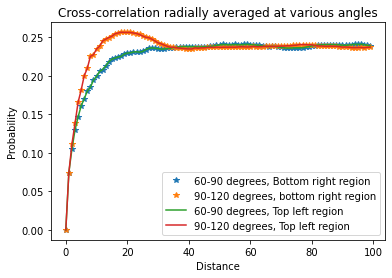

In [28]:


AngleChosenForOutput6090, img1_angularProbDistribution6090 =corr.angularDistribution(cross,60,90,0)
plt.plot(img1_angularProbDistribution6090,'*', label="60-90 degrees, Bottom right region")

AngleChosenForOutput90120, img1_angularProbDistribution90120 =corr.angularDistribution(cross,90,120,0)
plt.plot(img1_angularProbDistribution90120,'*', label="90-120 degrees, bottom right region")

AngleChosenForOutput6090, img2_angularProbDistribution6090 =corr.angularDistribution(cross,60,90,0)
plt.plot(img2_angularProbDistribution6090, label="60-90 degrees, Top left region")

AngleChosenForOutput90120, img2_angularProbDistribution90120 =corr.angularDistribution(cross,90,120,0)
plt.plot(img2_angularProbDistribution90120, label="90-120 degrees, Top left region" )



plt.title('Cross-correlation radially averaged at various angles')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.legend(loc="lower right")
plt.show()

## Hoshen Kopelman Algorithm

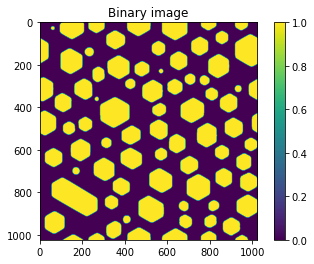

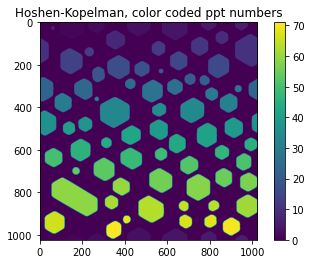

AttributeError: module 'Scripts.hoshenKopleman' has no attribute 'hoshenKoplemanLabels_nonpbc1'

In [29]:
# show binary image
plt.imshow(img_binary)
plt.colorbar()
plt.title('Binary image')
plt.show()

# Cluster the image, Could take ~ 60 sec

labels = hosh.hoshenKoplemanLabels(img_binary)
plt.imshow(labels)
plt.colorbar()
plt.title('Hoshen-Kopelman, color coded ppt numbers')
plt.show()

labels = hosh.hoshenKoplemanLabels_nonpbc1(img_binary)
plt.imshow(labels)
plt.colorbar()
plt.title('Hoshen-Kopelman non pbc, color coded ppt numbers')
plt.show()

1


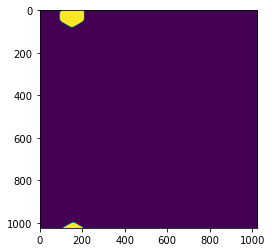

2


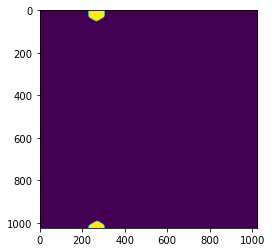

3


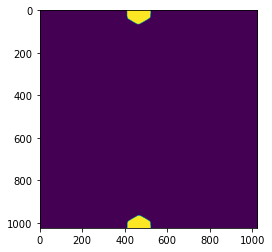

4


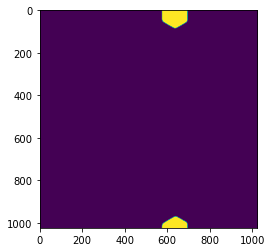

5


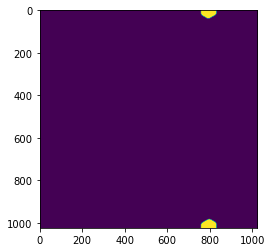

6


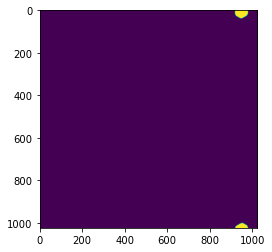

7


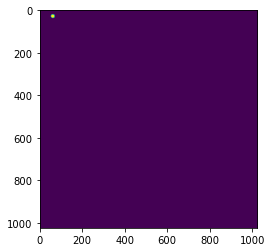

8


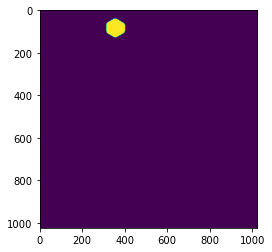

9


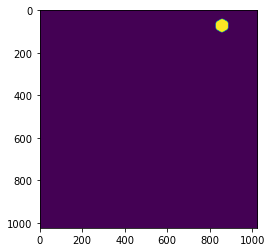

10


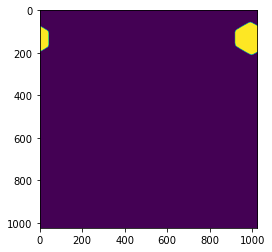

11


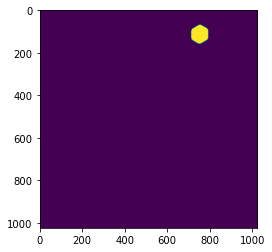

12


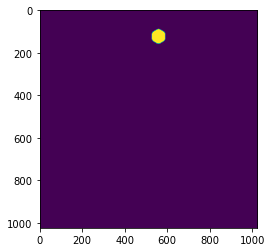

13


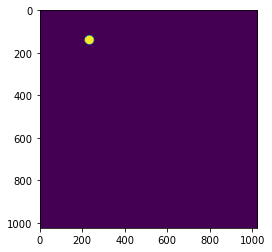

14


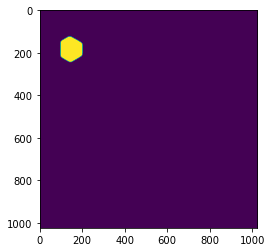

15


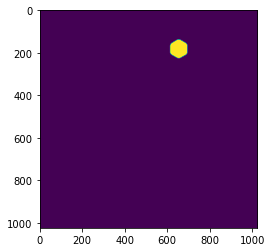

16


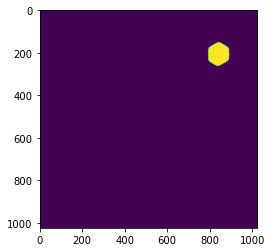

17


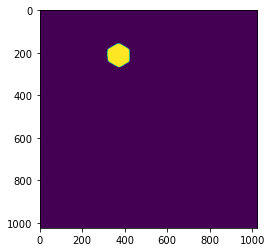

18


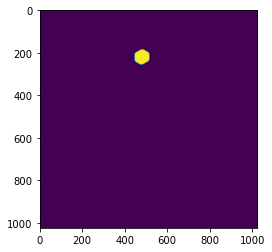

19


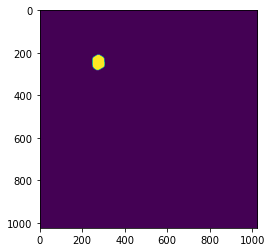

20


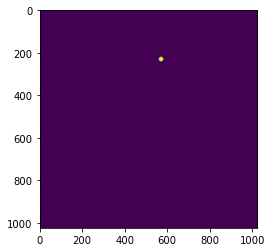

21


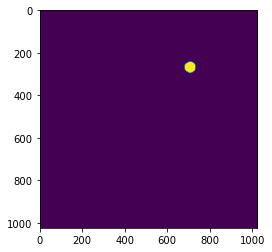

22


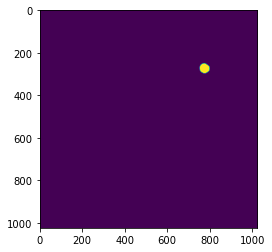

23


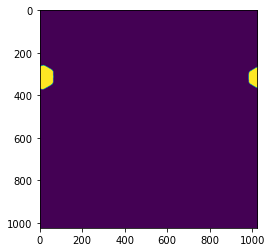

24


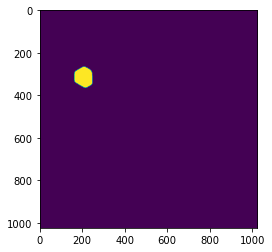

25


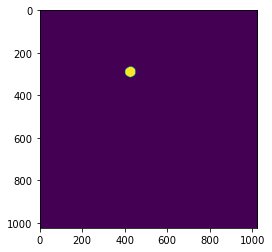

26


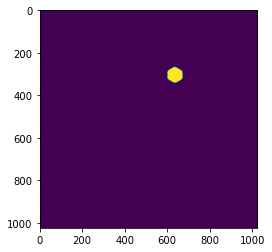

27


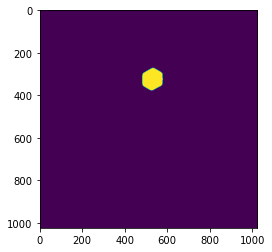

28


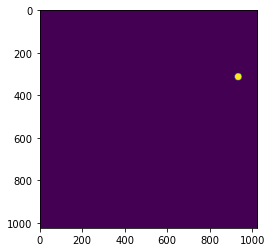

29


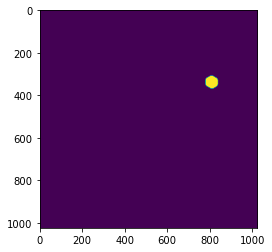

30


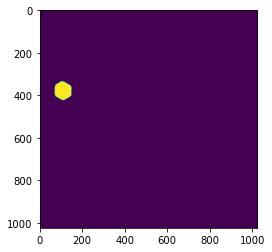

31


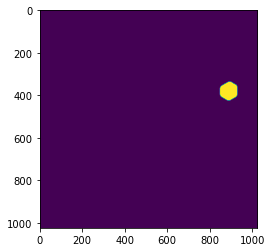

32


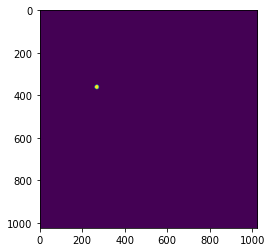

33


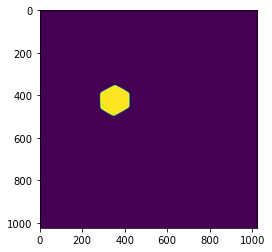

34


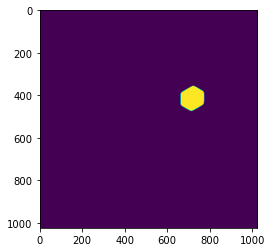

35


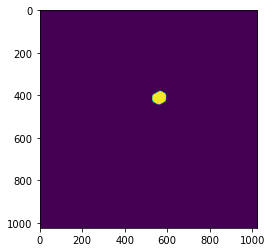

36


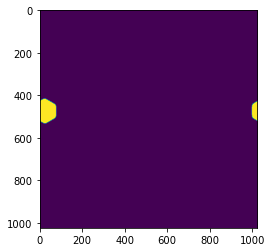

37


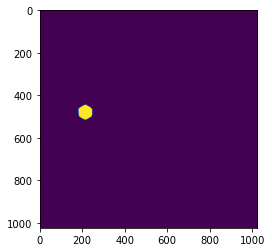

38


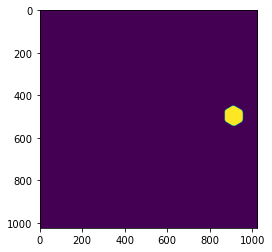

39


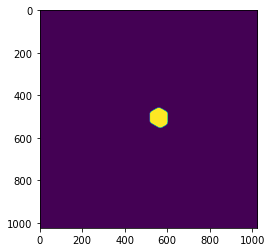

40


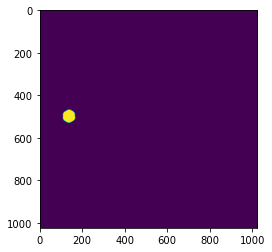

41


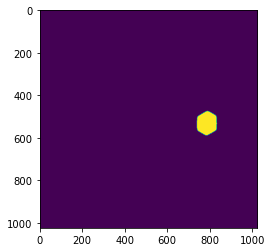

42


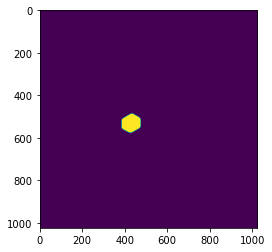

43


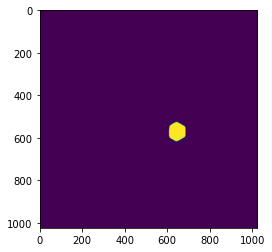

44


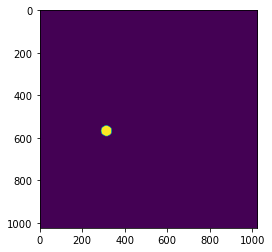

45


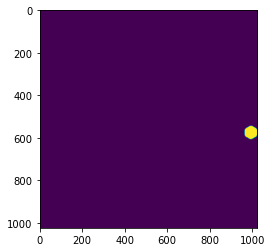

46


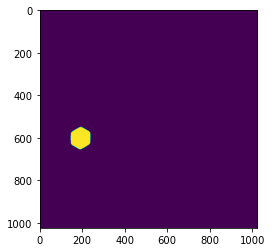

47


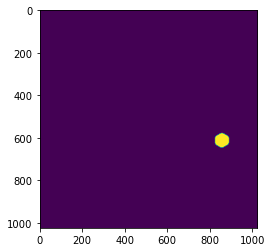

48


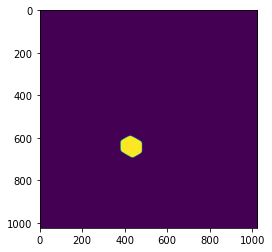

49


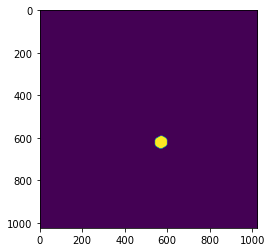

50


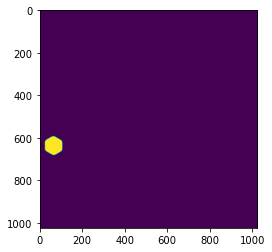

51


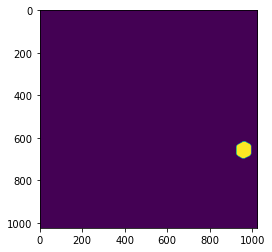

52


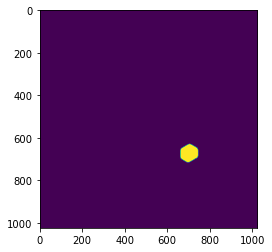

53


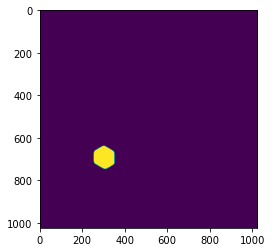

54


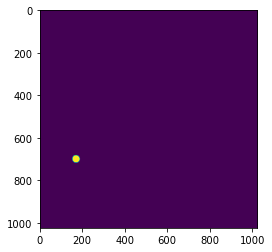

55


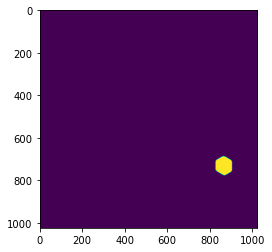

56


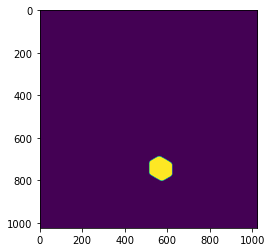

57


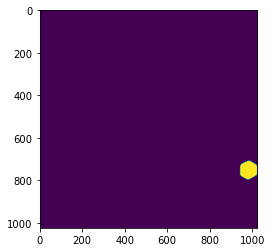

58


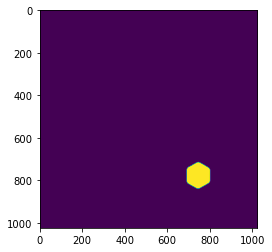

59


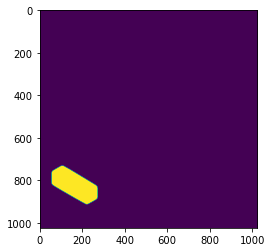

60


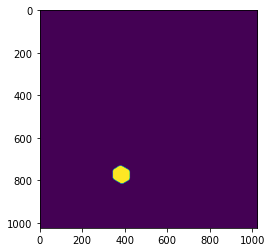

61


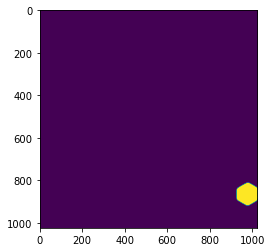

62


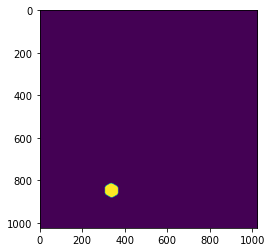

63


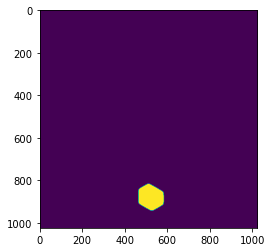

64


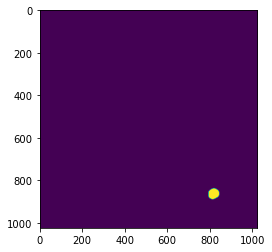

65


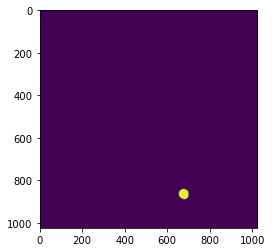

66


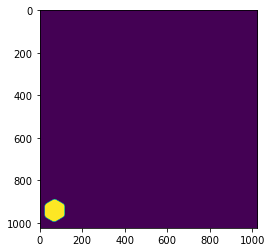

67


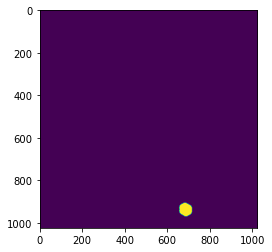

68


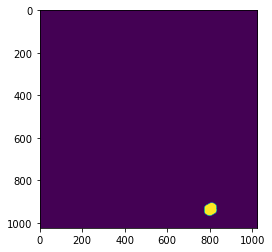

69


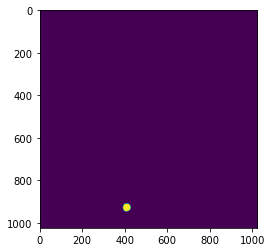

In [30]:
# Show some precipitates
for i in range(1,70):
    print(i)
    plt.imshow((labels==i)*1)
    plt.show()

## Hoshen Kopelman Applications

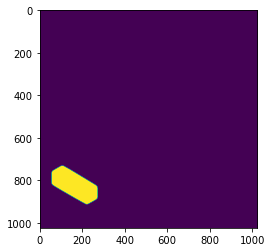

In [31]:
# Selecting a precipitate and showing it

ppt = (labels==59)*1
plt.imshow(ppt)

In [32]:
# Getting centre of gravity of image

cog_x, cog_y = hosh.precipitateCentres(labels, 59)
print('Cog X = ',cog_x,' Cog Y = ',cog_y)

Cog X =  822  Cog Y =  161


In [33]:
# Getting angle of inclination

angle, majorAxis, minorAxis, eigenVector = hosh.angleOfInclination(labels, 59)
print('Angle of inclination =',angle)

Angle of inclination = 30.674885279604933


## Precipitate Tracking Example

total number of ppts : 79


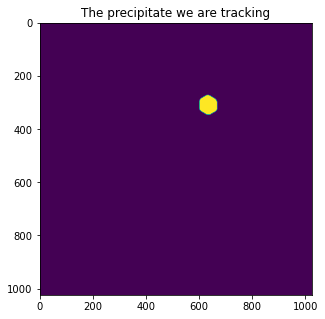

In [34]:
# Selecting precipitate from initial microstructure and displaying it

img_1 = corr.dat_to_numpy(list_files[0])
img_1 = (img_1>0.5)*1
labels = hosh.hoshenKoplemanLabels(img_1)

print('total number of ppts :', np.max(labels))

theChosenOne = 29
plt.rcParams["figure.figsize"] = (5,5)
referenceShape = (labels==theChosenOne)*1

plt.imshow(referenceShape)
plt.title('The precipitate we are tracking')
plt.show()

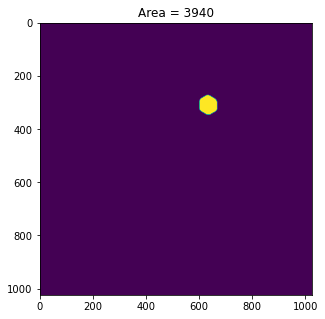

----------------------------------------------------------------------------


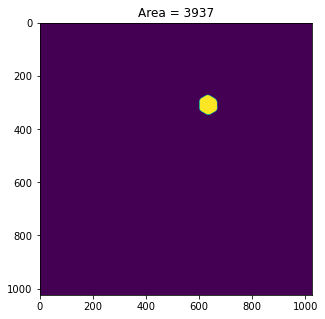

----------------------------------------------------------------------------


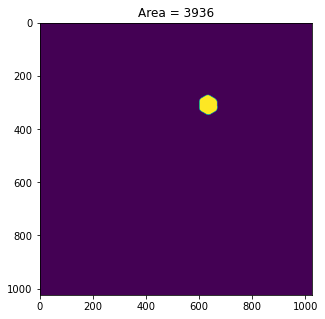

----------------------------------------------------------------------------


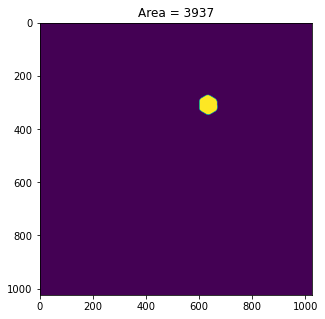

----------------------------------------------------------------------------


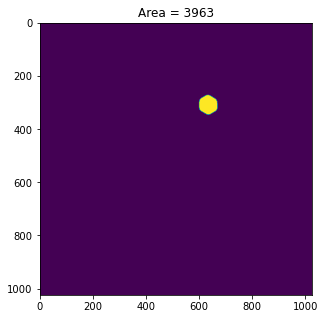

----------------------------------------------------------------------------


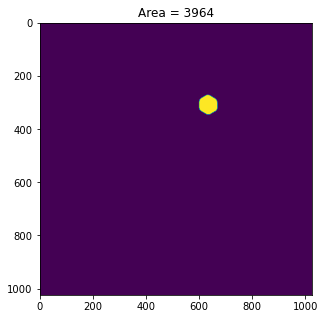

----------------------------------------------------------------------------


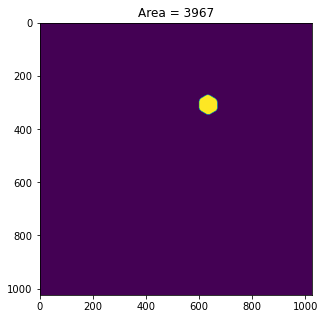

----------------------------------------------------------------------------


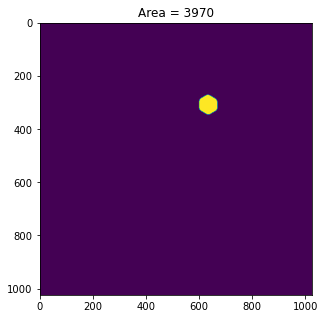

----------------------------------------------------------------------------


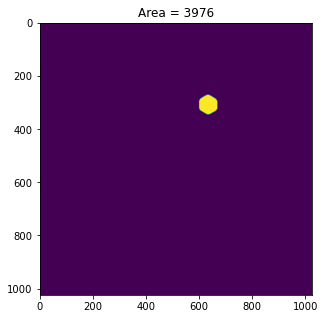

----------------------------------------------------------------------------


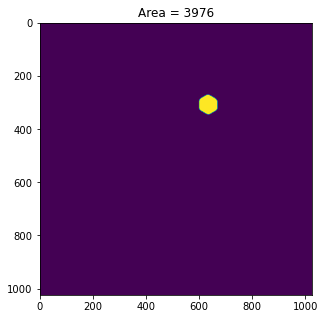

----------------------------------------------------------------------------


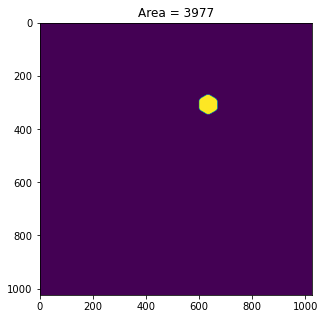

----------------------------------------------------------------------------


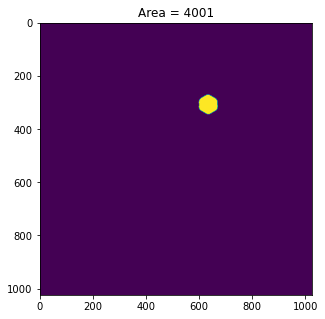

----------------------------------------------------------------------------


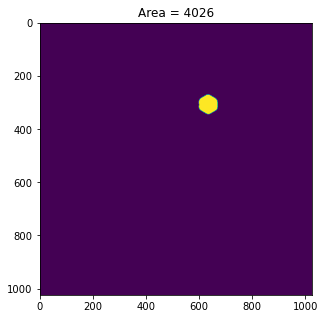

----------------------------------------------------------------------------


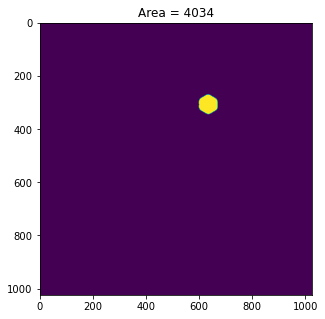

----------------------------------------------------------------------------


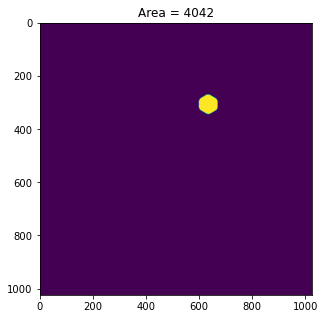

----------------------------------------------------------------------------


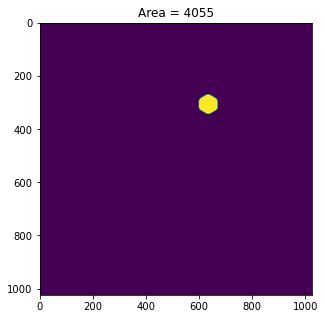

----------------------------------------------------------------------------


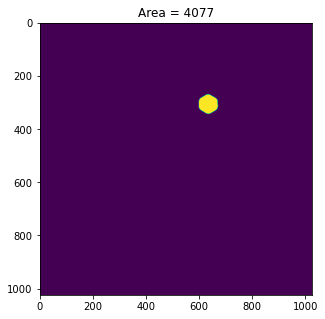

----------------------------------------------------------------------------


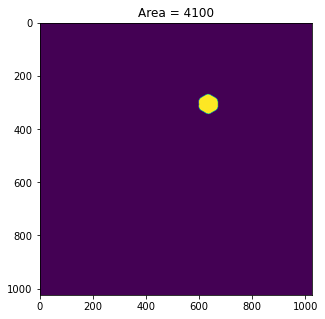

----------------------------------------------------------------------------


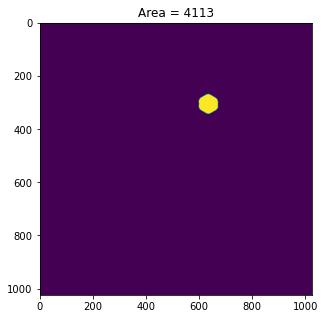

----------------------------------------------------------------------------


In [35]:
# Starting the tracking

for i in range(len(list_files)):
    
    # Binarizing the next time series image
    img_track1 = corr.dat_to_numpy(list_files[i])
    img_track1 = (img_track1>0.5)*1
    
    # Clustering the image to isolate precipitates
    labels_track1 = hosh.hoshenKoplemanLabels(img_track1)
    aaa = referenceShape*labels_track1
    
    # Checking the precipiatate with maximum common area with previous precipitate
    if np.sum(aaa)==0:
        print('the microstructure dissapeared, or moved very quickly')
        break
    label_for_our_ppt = np.median((aaa[aaa != 0]).flatten())
    image_tracked1_binary = (labels_track1==label_for_our_ppt)*1
    
    # Making this precipitate our precipitate to be tracked
    referenceShape = image_tracked1_binary
    
    # Showing the precipitate and the area of precipiate
    plt.imshow(image_tracked1_binary)
    plt.title('Area = '+str(np.sum(image_tracked1_binary)))
    plt.show()
    
    print('----------------------------------------------------------------------------')
    


## Calculate convexity of a single precipitate

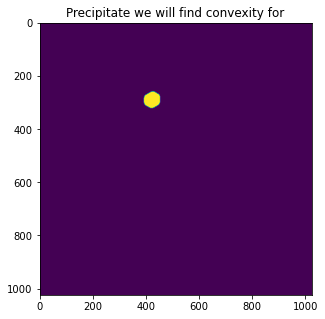

Convexity =  0.99994


In [36]:
# Choosing a precipitate to calculate convexity for

img = corr.dat_to_numpy(list_files[3])
img = (img>0.5)*1
labels = hosh.hoshenKoplemanLabels(img)
precipitate = (labels==27)*1
plt.imshow(precipitate)
plt.title('Precipitate we will find convexity for')
plt.show()

convexity = conv.monteCarloConvexity(precipitate)
print('Convexity = ', convexity)

## Calculating Short Ranged Average Convexity (SRAC) for an image

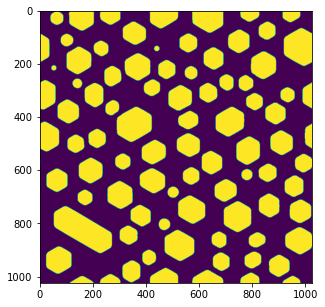

In [37]:
# Choosing image for SRAC calculation
plt.imshow(img)
plt.show()

In [38]:
srac = conv.shortRangedAverageConvexity(img, parts=4)
print('Short Ranged Average Convexity (SRAC) = ',srac)

Short Ranged Average Convexity (SRAC) =  0.41774750000000005


## Showing Hoshen Kopelman applications for experimental microstructures

In [39]:
from PIL import Image

In [40]:
im = Image.open('/Users/adithyaiyer/Desktop/ddp/mist/Experimental Microstructures/1_04.tiff')

In [41]:
image = np.array(im)

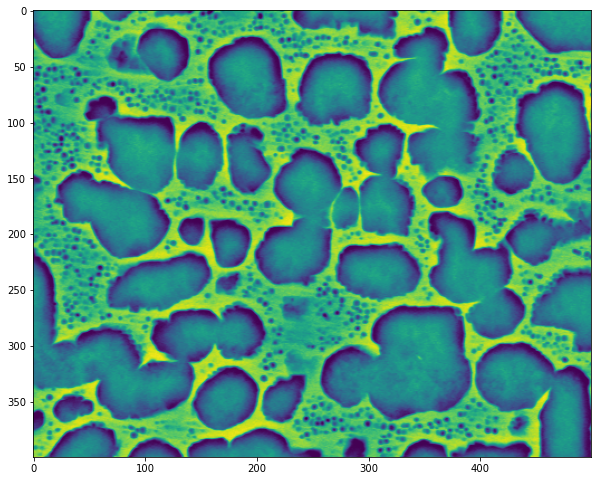

In [42]:
# Subsetting the image
cropped_image = image[0:400,500:1000]
plt.figure(figsize = (10,10))
plt.imshow(cropped_image)
plt.show()

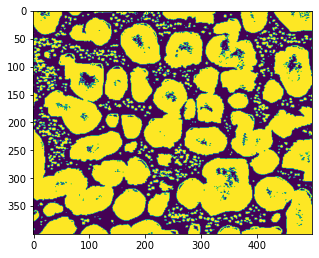

In [43]:
binarized = hosh.binarizeRealImage(cropped_image,upper_limit=140,lower_limit=0)
plt.imshow(binarized)
plt.show()

## Precipitate counting

In [44]:
HKLM = hosh.hoshenKoplemanLabels(binarized)
HKLM_non_PBC = hosh.hoshenKoplemanLabels_nonpbc(binarized)

Hoshen Kopelman Labelled Image


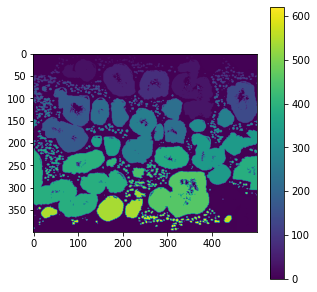

Hoshen Kopelman Labelled Image- Non PBC


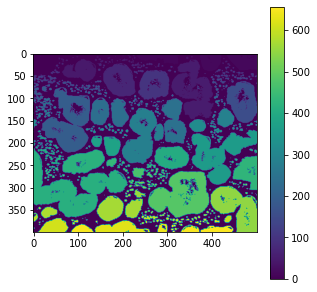

In [45]:
print("Hoshen Kopelman Labelled Image")
plt.imshow(HKLM)
plt.colorbar()
plt.show()

print("Hoshen Kopelman Labelled Image- Non PBC")
plt.imshow(HKLM_non_PBC)
plt.colorbar()
plt.show()

## Selecting only smaller precipitates of size 50-500 from the hklm(Hoshen Kopelman labelled microstructure) image

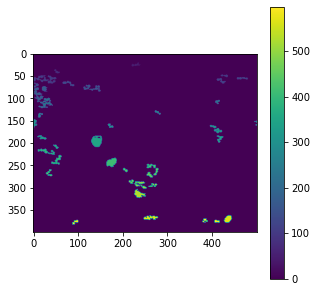

In [46]:
final_image = hosh.selectPrecipitateBySize(HKLM, min_size = 50, max_size = 500)
plt.imshow(final_image)
plt.colorbar()
plt.show()

# Getting precipitate distributions with start and end sized 50 and 500

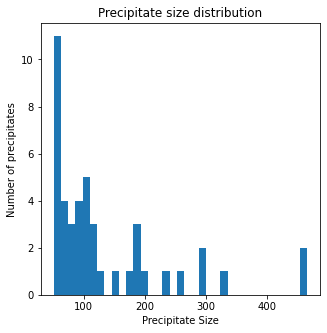

In [47]:
hist, bins = hosh.getHistogram(HKLM,50,500,35)


## Selecting only smaller precipitates of size 0-40 from the hklm(Hoshen Kopelman labelled microstructure) image

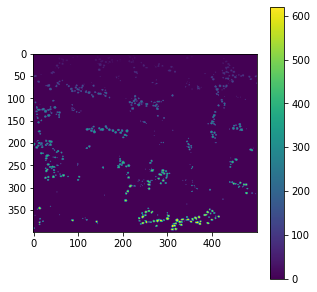

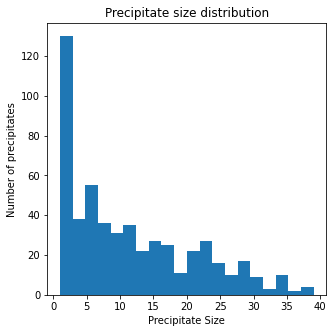

In [48]:
final_image = hosh.selectPrecipitateBySize(HKLM, min_size = 0, max_size = 40)
plt.imshow(final_image)
plt.colorbar()
plt.show()

hist, bins = hosh.getHistogram(HKLM,0,40, 20)

# Selelecting larger precipitates for both PBC and non-PBC conditions

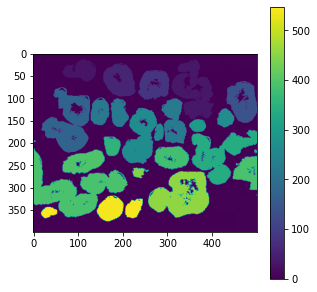

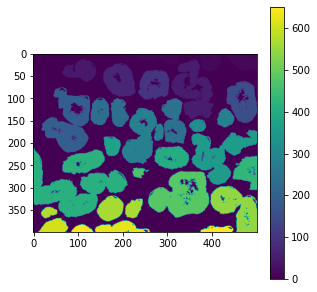

In [49]:
final_image = hosh.selectPrecipitateBySize(HKLM, min_size = 500, max_size = 100000)
plt.imshow(final_image)
plt.colorbar()
plt.show()

final_image_non_PBC = hosh.selectPrecipitateBySize(HKLM_non_PBC, min_size = 500, max_size = 100000)
plt.imshow(final_image_non_PBC)
plt.colorbar()
plt.show()

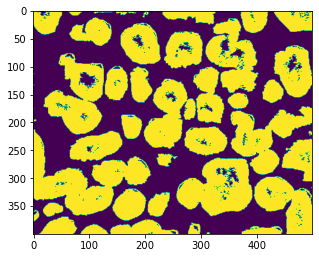

In [50]:
plt.imshow((final_image>0)*1)
#plt.colorbar()
plt.show()

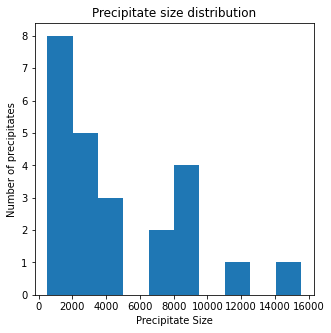

In [51]:
hist_PBC, bins_PBC = hosh.getHistogram(HKLM,500,50000,10)


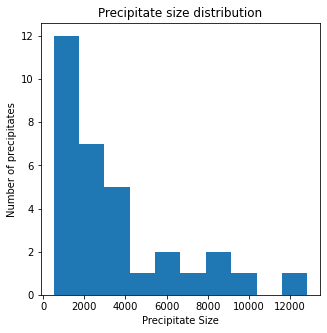

In [52]:
hist_non_PBC, bins_non_PBC = hosh.getHistogram(HKLM_non_PBC,500,50000,10)